In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

# Загрузка и обработка данных

In [2]:
df_full_data = pd.read_csv('home.csv')
df_full_data

,id,cleani,cleanv,clouds_all,main_feels_like,main_grnd_level,main_humidity,main_pressure,main_sea_level,main_temp,...,main_temp_min,normala,normalv,rain_1h,time,timestamp,visibility,wind_deg,wind_gust,wind_speed
0,5,0,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,0.00,0.00,0,00:39:17,1675643957,1407,332,7.16,2.59
1,13,2,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,2.50,0.00,0,00:49:54,1675644594,1407,332,7.16,2.59
2,20,4,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,5.00,0.00,0,00:51:38,1675644698,1407,332,7.16,2.59
3,26,6,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,7.50,0.00,0,00:53:06,1675644786,1407,332,7.16,2.59
4,32,7,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,8.75,0.00,0,00:54:36,1675644876,1407,332,7.16,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,26340,27,1345,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,33.75,1784.73,0,13:57:31,1676037451,10000,215,15.57,6.55
26340,26341,26,1344,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1783.40,0,13:57:59,1676037479,10000,215,15.57,6.55
26341,26342,28,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,35.00,1782.08,0,13:58:14,1676037494,10000,215,15.57,6.55
26342,26343,26,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1782.08,0,13:57:43,1676037463,10000,215,15.57,6.55


In [3]:
df_full_data.columns

Index(['id', 'cleani', 'cleanv', 'clouds_all', 'main_feels_like',
       'main_grnd_level', 'main_humidity', 'main_pressure', 'main_sea_level',
       'main_temp', 'main_temp_max', 'main_temp_min', 'normala', 'normalv',
       'rain_1h', 'time', 'timestamp', 'visibility', 'wind_deg', 'wind_gust',
       'wind_speed'],
      dtype='object')

In [4]:
df_clean_data = pd.read_csv('log.txt', sep=';')
df_clean_data

,time,normalv,clouds_all,main_temp,wind_deg,wind_speed
0,0,0.00,97,-3.42,332,2.59
1,0,0.00,97,-3.42,332,2.59
2,0,0.00,97,-3.42,332,2.59
3,0,0.00,97,-3.42,332,2.59
4,0,0.00,97,-3.42,332,2.59
...,...,...,...,...,...,...
26339,13,1784.73,99,-0.96,215,6.55
26340,13,1783.40,99,-0.96,215,6.55
26341,13,1782.08,99,-0.96,215,6.55
26342,13,1782.08,99,-0.96,215,6.55


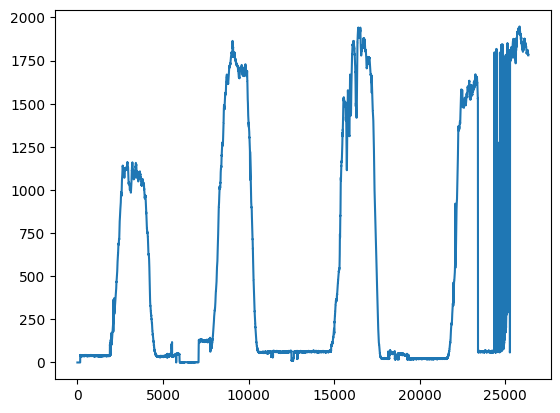

In [5]:
plt.plot(df_full_data['normalv'])

In [6]:
#Преобразуем время дня в секунды от начала дня
def make_time_to_seconds(daytime):
    return int(daytime[0:2])*3600+int(daytime[3:5])*60+int(daytime[6:])

In [7]:
df_full_data['time'] = df_full_data['time'].apply(make_time_to_seconds)
df_full_data

,id,cleani,cleanv,clouds_all,main_feels_like,main_grnd_level,main_humidity,main_pressure,main_sea_level,main_temp,...,main_temp_min,normala,normalv,rain_1h,time,timestamp,visibility,wind_deg,wind_gust,wind_speed
0,5,0,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,0.00,0.00,0,2357,1675643957,1407,332,7.16,2.59
1,13,2,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,2.50,0.00,0,2994,1675644594,1407,332,7.16,2.59
2,20,4,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,5.00,0.00,0,3098,1675644698,1407,332,7.16,2.59
3,26,6,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,7.50,0.00,0,3186,1675644786,1407,332,7.16,2.59
4,32,7,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,8.75,0.00,0,3276,1675644876,1407,332,7.16,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,26340,27,1345,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,33.75,1784.73,0,50251,1676037451,10000,215,15.57,6.55
26340,26341,26,1344,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1783.40,0,50279,1676037479,10000,215,15.57,6.55
26341,26342,28,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,35.00,1782.08,0,50294,1676037494,10000,215,15.57,6.55
26342,26343,26,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1782.08,0,50263,1676037463,10000,215,15.57,6.55


# Разбивка данных

In [8]:
#Разбиваем на признаки и целевые значения
X, y = df_full_data.drop(['normalv', 'cleanv', 'id', 'cleani', 'timestamp'], axis=1), df_full_data['normalv']
y = y/1000

In [9]:
#Разбиваем на обучающую, валидационную и тестовую выборки
X_train, X_buf, y_train, y_buf = train_test_split(X, y, random_state=42, train_size=0.65)
X_valid, X_test, y_valid, y_test = train_test_split(X_buf, y_buf, random_state=42, train_size=0.5)

In [10]:
#Инициализация модели
def get_model(n_inputs, n_outputs, learning_rate, batch_size):
    """
    n_inputs - количество входов
    n_outputs - количество выходов
    learning_rate - скорость обучения
    """
    model = Sequential([
        Dense(32, input_shape=(n_inputs,), kernel_initializer='normal', activation='linear'),
        Dense(64, kernel_initializer='normal', activation='relu'),
        Dense(64, kernel_initializer='normal', activation='linear'),
        Dense(64, kernel_initializer='normal', activation='relu'),
        Dense(128, kernel_initializer='normal', activation='relu'),
        Dense(32, kernel_initializer='normal', activation='linear'),
        Dense(n_outputs, activation='linear')
    ])
              
    model.compile(
        optimizer=tf.optimizers.Adam(
            learning_rate=learning_rate,
        ),
        loss="mse",
        metrics=["mae", "mse"],
    )
    return model

In [11]:
#Обучение модели
def train(X_train, y_train, X_test, y_test, learning_rate, epochs, verbose=1):
    """
    learning_rate - скорость обучения
    epochs - количество эпох
    """
    # Build the model
    model = get_model(n_inputs=X_train.shape[1], n_outputs=1,
                      learning_rate=learning_rate, batch_size=32)
        
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Train the model
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        verbose=verbose,
        validation_data=(X_valid, y_valid),
        callbacks = [callback],
    )

    loss = history.history["loss"][-1]
    mae = history.history["mae"][-1]
    rmse = np.sqrt(history.history["mse"][-1])

    if verbose == 0:
        print(f"loss: {loss} - mae: {mae} - rmse: {rmse}")

    return model, history, loss

In [12]:
model, history, base_loss = train(X_train, y_train, X_test, y_test, learning_rate=1e-3, epochs=1000)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.8788 - mae: 0.4406 - mse: 0.8788 - val_loss: 0.2319 - val_mae: 0.3650 - val_mse: 0.2319
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.1510 - mae: 0.2795 - mse: 0.1510 - val_loss: 0.1259 - val_mae: 0.2365 - val_mse: 0.1259
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.0833 - mae: 0.2001 - mse: 0.0833 - val_loss: 0.0572 - val_mae: 0.1617 - val_mse: 0.0572
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.0627 - mae: 0.1677 - mse: 0.0627 - val_loss: 0.0562 - val_mae: 0.1651 - val_mse: 0.0562
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.0530 - mae: 0.1469 - mse: 0.0530 - val_loss: 0.0432 - val_mae: 0.1440 - val_mse: 0.0432
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.0411 - mae: 0.1264 - mse: 0.0411 - val_loss: 0.0444 - val_mae: 0.1293 - val_mse: 0.0444
Epoc

In [13]:
preds = model.predict(X_test)
preds[:100]

145/145 [==============================] - 0s 764us/step


array([[ 4.9199119e-02],
       [ 6.3406587e-01],
       [ 4.2251781e-02],
       [ 1.6467962e+00],
       [ 4.5616701e-02],
       [ 1.0530233e-01],
       [ 5.7436037e-01],
       [ 1.7146168e+00],
       [ 3.6306113e-02],
       [ 5.5910304e-02],
       [ 1.8747104e+00],
       [ 5.5123463e-02],
       [ 4.0496677e-02],
       [ 1.5985003e+00],
       [ 2.2029132e-02],
       [ 1.6006188e+00],
       [ 3.8486212e-02],
       [ 2.2971773e-01],
       [ 4.2069301e-02],
       [ 4.1535759e-01],
       [ 1.3542160e-02],
       [ 1.7667680e+00],
       [ 2.0778358e-02],
       [ 1.5848730e+00],
       [ 3.1227365e-02],
       [ 1.7808886e+00],
       [ 1.1259748e+00],
       [ 2.3800924e-02],
       [ 1.4122099e-02],
       [ 3.5780147e-02],
       [ 1.8609241e-02],
       [ 1.7215321e+00],
       [ 1.2614280e+00],
       [ 4.7676340e-02],
       [ 1.3913473e-01],
       [ 1.8534963e+00],
       [ 1.7250650e+00],
       [ 1.7286520e+00],
       [ 4.6690688e-02],
       [ 1.0967835e+00],


# Метрики

In [14]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, max_error

In [15]:
mean_absolute_percentage_error(preds, y_test)

0.2444526010219903

In [16]:
r2_score(y_test, preds)

0.996207794232756

In [17]:
mean_squared_error(y_test, preds, squared=False)

0.042521657748155514

In [18]:
max_error(y_test, preds)

0.7941839475631713

# Сохраняем модель

In [19]:
#Модель
model.save('my_model.h5')

In [20]:
#Веса
model.save_weights("model_new_weights.h5")